# Exo planet Anaylsis
----
Anaylsis performed for Hack benchers 2 Project

In [2]:
# Importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading CSV
data = pd.read_csv('oec.csv')
# Show data head
data.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [4]:
# Find Min amd Max of DistFromSunParsec
{ 'maximum': max(data["DistFromSunParsec"]), 'minimum': min(data["DistFromSunParsec"]) }

{'maximum': 8500.0, 'minimum': 1.295}

In [5]:
# Convert RA to decimal degrees
data['RA'] = [str(i) for i in data['RightAscension']]
data['RA'] = [i.split(" ") for i in data['RA']]
data = data[[len(i) == 3 for i in data['RA']]]
data['RA'] = [float(j[0]) + float(j[1])/60 + float(j[2])/360 for j in data['RA']]

# Convert DEC to decimals degrees
data['DEC'] = [str(i) for i in data['Declination']]
data['DEC'] = [i.split(" ") for i in data['DEC']]
data['DEC'] = [float(j[0]) + float(j[1])/60 + float(j[2])/360 if float(j[0]) > 0 else float(float(j[0]) - float(j[1])/60 - float(j[2])/360) for j in data['DEC']]

Now as measurements of * **RA** (Right Ascension)* and * **DEC** (Declination)* are measured **geocentrically** i.e. they are measured with respect to earth. So finding distance between earth and exo planet we need to convert spherical co-ordinates to cartisian coordiates then use distance formula to find distance. After solving quadratic equation we get distance (**r**) as:

$$
r = d \cos{\delta}\cos{\alpha} + \sqrt(r_o^2 + d^2\cos^2{\delta} \cos^2{\alpha} - d^2)
$$

where $$ \\ r_o = \text{helocentric (i.e. from sun) distance of exoplanent} 
       \\ d = \textrm{distance of sun from earth}
       \\ \delta = \textrm{Declination of exoplanet (DEC)}
       \\ \alpha = \textrm{Right Ascension of exoplanet (RA)} $$

In [6]:
# adding distance of exoplanents from earth
d = 4.84814e-6 # in parsec
t = d*np.cos(data["DEC"])*np.cos(data["RA"])
data["DistFromEarthParsec"] = t + np.sqrt(np.square(data["DistFromSunParsec"]) + np.square(t) - d**2)
pd.Series(data["DistFromEarthParsec"], dtype="str")

0       17.236001576919275
1       17.236001576919275
2                      nan
3                      nan
4                      nan
5        650.0000035813794
6        650.0000035813794
7        650.0000035813794
8        43.25000106308892
9                      nan
10       432.9999960024413
11      142.99999876032842
12       6500.000001775559
13                     nan
14                     nan
15      199.99999955262612
16      14.550000042420987
17       626.0999982331421
18       626.0999982331421
19       77.81999946158899
20       77.81999946158899
21         63.689995933175
22                     nan
23       48.29999772294017
24       48.29999772294017
25                     nan
26                     nan
27                     nan
28                     nan
29                     nan
               ...        
3554                   nan
3555                   nan
3556                   nan
3557     380.0000002100586
3558                   nan
3559                   nan
3

In [7]:
# Clean data
data = data[pd.Series(data["DistFromEarthParsec"], dtype="str") != "nan"]
len(data)

2133

In [8]:
# Sort by Distance from the earth
data.sort_values(by="DistFromEarthParsec", inplace=True)
data = data.reset_index(drop=True)

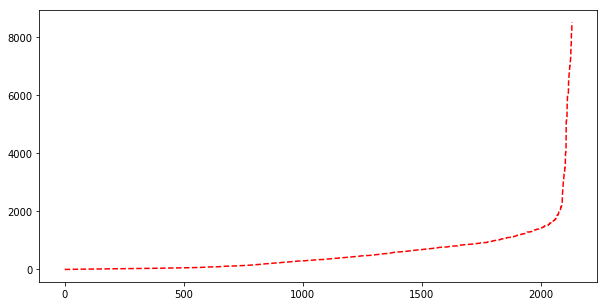

In [9]:
# Plot Distance from earth
plt.figure(figsize=(10,5))
#plt.xticks(np.arange(2133), data["PlanetIdentifier"])
plt.plot(np.array(data["DistFromEarthParsec"]).T,'r--')

In [10]:
data.iloc[0]

PlanetIdentifier                                       Proxima Centauri b
TypeFlag                                                                2
PlanetaryMassJpt                                                 0.004089
RadiusJpt                                                             NaN
PeriodDays                                                         11.186
SemiMajorAxisAU                                                    0.0485
Eccentricity                                                          NaN
PeriastronDeg                                                         NaN
LongitudeDeg                                                          110
AscendingNodeDeg                                                      NaN
InclinationDeg                                                        NaN
SurfaceTempK                                                          234
AgeGyr                                                                NaN
DiscoveryMethod                       

In [11]:
data["ListsPlanetIsOn"].value_counts()

Confirmed planets                                                                     1888
Confirmed planets, Planets in binary systems, S-type                                   129
Controversial                                                                           54
Controversial, Planets in binary systems, S-type                                        20
Confirmed planets, Planets in binary systems, P-type                                    16
Confirmed planets, Planets in open clusters                                             13
Controversial, Planets in binary systems, P-type                                         4
Retracted planet candidate                                                               4
Confirmed planets, Orphan planets                                                        2
Kepler Objects of Interest                                                               1
Planets in binary systems, S-type, Confirmed planets                                     1

In [12]:
data[data["ListsPlanetIsOn"] == "Confirmed planets, Orphan planets"]

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn,RA,DEC,DistFromEarthParsec
207,PSO J318.5-22,3,6.5,1.53,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,NaN,NaN,NaN,NaN,"Confirmed planets, Orphan planets",21.255556,22.950000,24.600002
372,CFBDSIR2149,3,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,NaN,NaN,NaN,NaN,NaN,"Confirmed planets, Orphan planets",21.947222,-4.072222,40.000003


In [13]:
# export dataframe as csv
data.to_csv("data.csv")